In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load dataset
df = pd.read_csv("student.csv")

In [3]:
#display dataframe
df

,Unnamed: 0,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,0,5001,21.0,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,1,5002,NaN,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,2,5003,NaN,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,3,5004,18.0,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,4,5005,22.0,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,140,5141,22.0,Female,State,50%,Yes,Yes,Private,2,Always,No,Yes,No,Yes,CC
141,141,5142,18.0,Female,State,NaN,No,No,Private,2,Never,No,Yes,Yes,No,CC
142,142,5143,18.0,Female,Private,75%,No,No,Private,2,Always,Yes,No,No,No,AA
143,143,5144,22.0,Female,State,NaN,Yes,Yes,Bus,12,Sometimes,No,Yes,No,NaN,CB


In [5]:
#shows rows ans columns count
df.shape

(145, 16)

In [6]:
# shows dimensions
df.ndim

2

In [7]:
#displays information about the dataframe, including the number of rows and columns, 
#the data types of the columns, the number of non-null values in each column, 
#and the amount of memory used by the dataframe.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          145 non-null    int64  
 1   Id                  145 non-null    int64  
 2   Student_Age         129 non-null    float64
 3   Sex                 145 non-null    object 
 4   High_School_Type    145 non-null    object 
 5   Scholarship         135 non-null    object 
 6   Additional_Work     145 non-null    object 
 7   Sports_activity     145 non-null    object 
 8   Transportation      139 non-null    object 
 9   Weekly_Study_Hours  145 non-null    int64  
 10  Attendance          145 non-null    object 
 11  Reading             145 non-null    object 
 12  Notes               145 non-null    object 
 13  Listening_in_Class  145 non-null    object 
 14  Project_work        139 non-null    object 
 15  Grade               145 non-null    object 
dtypes: float

In [8]:
#returns description of the data in the DataFrame excluding null values.
df.describe()

,Unnamed: 0,Id,Student_Age,Weekly_Study_Hours
count,145.000000,145.000000,129.000000,145.000000
mean,72.000000,5073.000000,19.604651,3.965517
std,42.001984,42.001984,1.950235,5.355960
min,0.000000,5001.000000,18.000000,0.000000
25%,36.000000,5037.000000,18.000000,0.000000
50%,72.000000,5073.000000,19.000000,2.000000
75%,108.000000,5109.000000,21.000000,7.000000
max,144.000000,5145.000000,26.000000,28.000000


In [9]:
#gives datatype of each column
df.dtypes

Unnamed: 0              int64
Id                      int64
Student_Age           float64
Sex                    object
High_School_Type       object
Scholarship            object
Additional_Work        object
Sports_activity        object
Transportation         object
Weekly_Study_Hours      int64
Attendance             object
Reading                object
Notes                  object
Listening_in_Class     object
Project_work           object
Grade                  object
dtype: object

In [10]:
#Missing values
df.isnull().sum()

Unnamed: 0             0
Id                     0
Student_Age           16
Sex                    0
High_School_Type       0
Scholarship           10
Additional_Work        0
Sports_activity        0
Transportation         6
Weekly_Study_Hours     0
Attendance             0
Reading                0
Notes                  0
Listening_in_Class     0
Project_work           6
Grade                  0
dtype: int64

In [32]:
#handling missing values
#replacing nan with mean,mode,median,0,dropping row,column,etc
#mode() returns a Series (a type of pandas DataFrame), not a single value. 
#This is because there can technically be multiple modes in a dataset. By indexing with [0], you are selecting the first mode in the dataset.
df['Scholarship'].fillna(df['Scholarship'].mode()[0], inplace=True)
df['Transportation'].fillna('Unknown', inplace=True)
df['Project_work'].fillna(0, inplace=True)
df['Student_Age'].fillna(df['Student_Age'].mean(), inplace=True)

C:\Users\moren\AppData\Local\Temp\ipykernel_4724\3961488764.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Student_Age'].fillna(df['Student_Age'].mean(), inplace=True)


In [33]:
df.isnull().sum()

Unnamed: 0            0
Id                    0
Student_Age           0
Sex                   0
High_School_Type      0
Scholarship           0
Additional_Work       0
Sports_activity       0
Transportation        0
Weekly_Study_Hours    0
Attendance            0
Reading               0
Notes                 0
Listening_in_Class    0
Project_work          0
Grade                 0
dtype: int64

In [46]:
# Outliers are data points that significantly differ from other observations in a dataset. 
# They are observations that lie far away from the rest of the data, 
# either on the higher or lower end of the distribution.

#detection of outliers using IQR

def count_out(column):
    Q1=column.quantile(0.25)
    Q3=column.quantile(0.75)
    IQR=Q3-Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    outliers=(column<lower_bound) | (column > upper_bound)
    return outliers.sum()

# Create a dataframe with only numerical columns

num_df = df.select_dtypes(include =[np.number])

#Count ouliers for each column

out_count=num_df.apply(count_out)

# Display the count of outliers for each column

print("Number of outliers in each numerical column:")
print(out_count)

Number of outliers in each numerical column:
Unnamed: 0            0
Id                    0
Student_Age           1
Weekly_Study_Hours    4
dtype: int64


In [35]:
df['Weekly_Study_Hours'].describe()

count    145.000000
mean       3.965517
std        5.355960
min        0.000000
25%        0.000000
50%        2.000000
75%        7.000000
max       28.000000
Name: Weekly_Study_Hours, dtype: float64

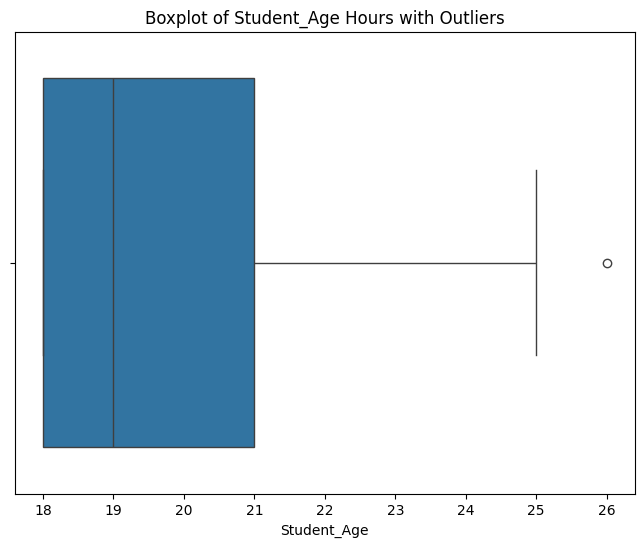

In [44]:
#VISUALIZATION OF OUTLIERS

import seaborn as sns

plt.figure(figsize = (8,6))
sns.boxplot(x=df['Student_Age'])
plt.title('Boxplot of Student_Age Hours with Outliers')
plt.xlabel('Student_Age')
plt.show()

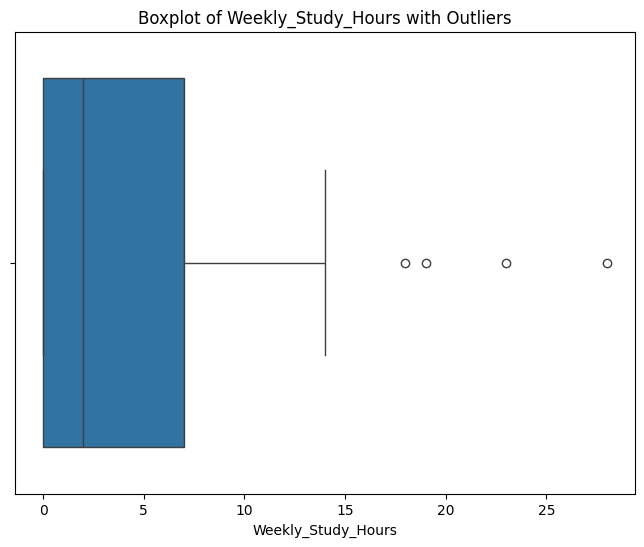

In [47]:
plt.figure(figsize = (8,6))
sns.boxplot(x=df['Weekly_Study_Hours'])
plt.title('Boxplot of Weekly_Study_Hours with Outliers')
plt.xlabel('Weekly_Study_Hours')
plt.show()

In [48]:
# DEALING WITH OR HANDLLING OUTLIERS
# CAPPING- replacing outliers with lower or upper bound values
# np.where(...): This is a function from the numpy library that acts like an if-else statement.
# It takes three arguments: a condition,a value to return if the condition is true, 
# and a value to return if the condition is false.


new_df_cap = df.copy()
new_df_cap['Weekly_Study_Hours'] = np.where(
    new_df_cap['Weekly_Study_Hours'] > df['Weekly_Study_Hours'].quantile(0.75),
    df['Weekly_Study_Hours'].quantile(0.75),
    np.where(
        new_df_cap['Weekly_Study_Hours'] < df['Weekly_Study_Hours'].quantile(0.25),
        df['Weekly_Study_Hours'].quantile(0.25),
        new_df_cap['Weekly_Study_Hours']
    )    
)

new_df_cap.shape

(145, 16)

Text(0.5, 1.0, 'Boxplot of Weekly_Study_Hours Hours without Outliers')

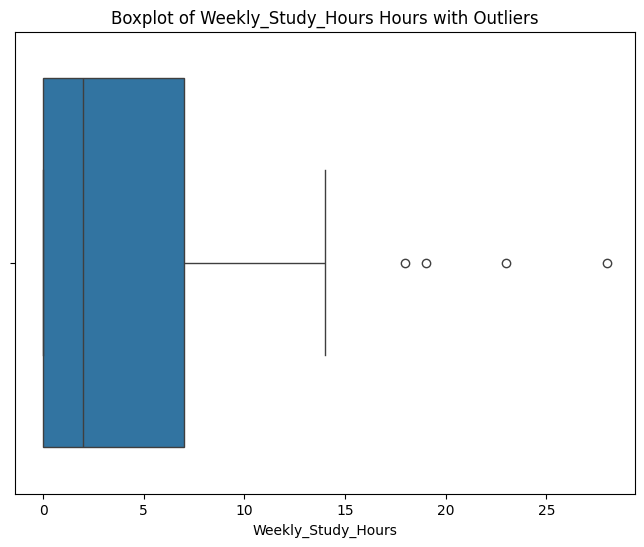

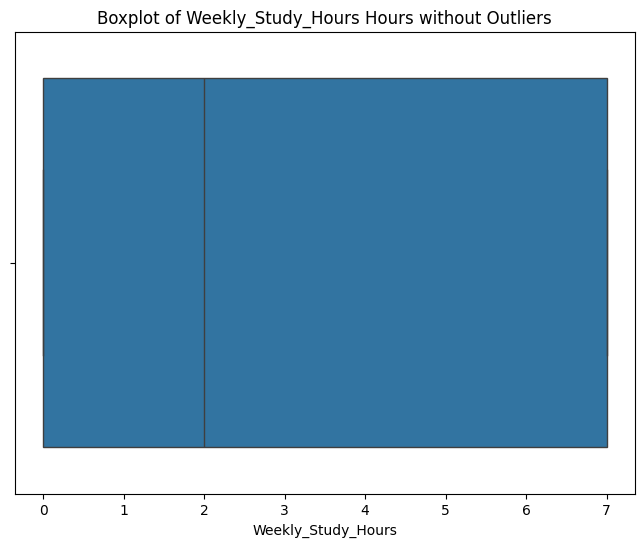

In [51]:
#Comparing both plots with outliers and without outlier

plt.figure(figsize=(8,6))
sns.boxplot(x=df['Weekly_Study_Hours'])
plt.title('Boxplot of Weekly_Study_Hours Hours with Outliers')

plt.figure(figsize=(8,6))
sns.boxplot(x=new_df_cap['Weekly_Study_Hours'])
plt.title('Boxplot of Weekly_Study_Hours Hours without Outliers')

In [52]:
# TRIMMING: deleting rows which contains outliers

new_df = df[df['Student_Age'] < df['Student_Age'].quantile(0.75)]

In [53]:
new_df.shape

(104, 16)

Text(0.5, 1.0, 'Boxplot of Student_Age without Outliers')

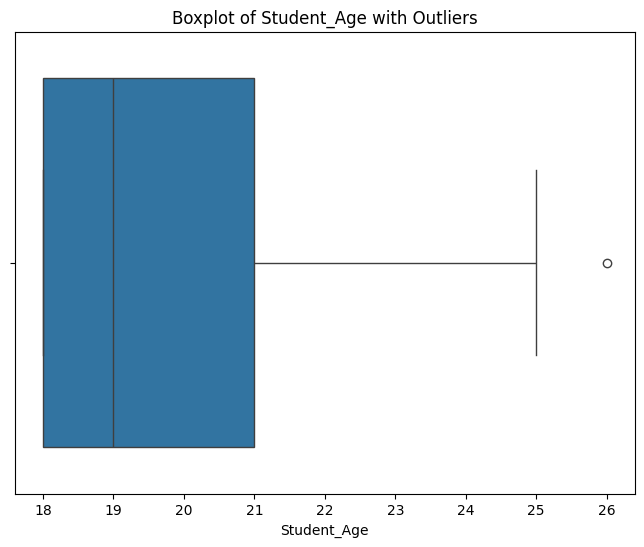

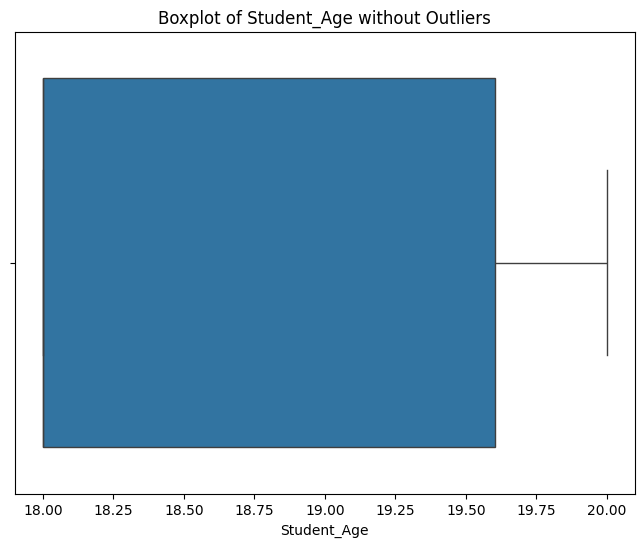

In [54]:
# Comparing dataframes

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Student_Age'])
plt.title('Boxplot of Student_Age with Outliers')


plt.figure(figsize=(8, 6))
sns.boxplot(x=new_df['Student_Age'])
plt.title('Boxplot of Student_Age without Outliers')


In [55]:
# NON-NORMAL DISTRIBUTION TO NORMAL DISTRIBUTION
# if data is not normally distributed it has skewness either positive or negative
# two ways to handle - 1. log trasformation
#                      2. square-root transformation

# Display skewness for each column
skewness = num_df.skew()
print("Skewness of Numeric Columns:")
print(skewness)
print("\n")

Skewness of Numeric Columns:
Unnamed: 0            0.000000
Id                    0.000000
Student_Age           1.176238
Weekly_Study_Hours    1.657166
dtype: float64




In [56]:
# Apply log transformation to the positively skewed columns
num_df['Student_Age'] = np.log1p(num_df['Student_Age'])
num_df['Weekly_Study_Hours'] = np.log1p(num_df['Weekly_Study_Hours'])

# Display skewness for each column after transformation
skewness_after = num_df[['Student_Age', 'Weekly_Study_Hours']].skew()
print("Skewness of Numeric Columns after Log Transformation:")
print(skewness_after)

Skewness of Numeric Columns after Log Transformation:
Student_Age           0.988321
Weekly_Study_Hours    0.387287
dtype: float64


In [58]:
num_df['Student_Age'] = np.sqrt(num_df['Student_Age'])
skewness = num_df['Student_Age'].skew()
print("Skewness after square root transformation:", skewness)

Skewness after square root transformation: 0.9463499753803329
